# การเรียนการสอน


*   นางสาวณกมล ทรัพย์ฟูเกียรติ 6409620025
*   นายชุติพนธ์ กัลยาประสิทธิ์ 6409680110

# Import Library & Data

In [ ]:
pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 34.2 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import bokeh.plotting as bplt
import re

import wordcloud
from wordcloud import WordCloud

import pythainlp
from pythainlp import word_tokenize
from pythainlp.corpus import get_corpus

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/CS246/Copy of แบบสอบถามความคาดหวังของการเรียนการสอนใน~งนักศึกษามหาวิทยาลัยธรรมศาสตร์ (Responses) - Form Responses 1 (1).csv')
data

,Timestamp,เพศ,ระดับชั้นปี,คณะ,สาขาวิชา (ถ้าไม่มีทำเครื่องหมาย -),เหตุผลที่ท่านเข้ารับการศึกษาในมหาวิทยาลัยธรรมศาสตร์,ท่านพึงพอใจกับสภาพแวดล้อมการเรียนรู้,ท่านคิดว่าสภาพแวดล้อมการเรียนรู้มีผลต่อประสิทธิภาพในการเรียนการสอน,ท่านมีความพึงพอใจในวิธีการสอนของครูหรืออาจารย์,ท่านรู้สึกว่าครูหรืออาจารย์มีส่วนร่วมในการสร้างประสบการณ์การเรียนที่ดี,...,จากข้อที่แล้ว ท่านคิดว่าเป็นเพราะเหตุ?,ทักษะอะไรที่นักศึกษาจำเป็นต้องมีสำหรับการเรียนการสอนในอนาคต?,ท่านคิดว่าอะไรคือสิ่งที่สำคัญที่สุดที่เราควรทำเพื่อเตรียมพร้อมสำหรับการศึกษาในอนาคต?,ท่านคิดว่ารูปแบบการเรียนการสอนในอนาคตจะเปลี่ยนไปอย่างไร?,ท่านคิดว่าเทคโนโลยีอะไรบ้างจะส่งผลต่อการศึกษาอนาคต,จากข้อที่แล้ว ท่านคิดว่าเทคโนโลยีที่ท่านเลือกจะมีบทบาทอย่างไรในการศึกษาในอนาคต,ท่านคิดว่าระบบการประเมินผลในอนาคตควรเป็นอย่างไร,ท่านคิดว่าอะไรคืออุปสรรคที่สำคัญที่สุดต่อการศึกษาที่มีคุณภาพในอนาคต?,ท่านมีความคิดเห็นหรือข้อเสนอแนะเพิ่มเติมเกี่ยวกับการศึกษาในอนาคตหรือไม่?,หากท่านมีความประสงค์จะรับผลการสำรวจของโครงงานเรา กรุณากรอกอีเมลลงช่องที่เว้นไว้ให้
0,4/1/2024 11:08:06,หญิง,ปีที่ 3 (รหัส 64),คณะวิทยาศาสตร์และเทคโนโลยี,สถิติ,สภาพแสดล้อม การให้อิสระกับนักศึกษา และสอบติดที...,4,5,3,3,...,ทุกคนต้องมีความรู้พื้นฐานในระดับปริญญาตรี เพื่...,"ทักษะการคิดวิเคราะห์และแก้ปัญหา, ทักษะการเรียน...",คิดวิเคราะห์ แก้ปัญหา,เน้นการเรียนรู้แบบ Blended Learning : คือ ผสมผ...,ปัญญาประดิษฐ์ (AI) คือ วิเคราะห์ข้อมูล แนะนำแน...,ช่วยในการค้นคว้าหาความรู้ได้ง่ายขึ้น,ประเมินผลแบบ Real-time คือ ประเมินผลตลอดการเรี...,ความเหลื่อมล้ำ,NaN,NaN
1,4/1/2024 11:08:06,ชาย,ปีที่ 4 (รหัส 63),คณะวิทยาศาสตร์และเทคโนโลยี,สถิติ,เป็นมหาวิทยาลัยชั้นนำของประเทศ,5,5,4,4,...,มีความรู้ติดตัวไว้ย่อมดีกว่า,"ทักษะการคิดวิเคราะห์และแก้ปัญหา, ทักษะการเรียน...",สื่อสาร ทำงานเป็นทีม,เน้นการเรียนรู้แบบ Active Learning : คือ ผู้เร...,ปัญญาประดิษฐ์ (AI) คือ วิเคราะห์ข้อมูล แนะนำแน...,เวลาต้องการศึกษาด้วยตัวเองแต่ไม่เข้าใจ สามารถใ...,ประเมินผลแบบองค์รวม คือ ประเมินผลมากกว่าความรู...,แรงจูงใจ,NaN,NaN
2,4/1/2024 11:38:37,ชาย,ปีที่ 4 (รหัส 63),คณะวิทยาศาสตร์และเทคโนโลยี,สถิติ,ต้องการวุฒิการศึกษาที่ดี,4,5,4,4,...,การวัดผลจากการศึกษาเป็นสิ่งที่จำเป็นมี,"ทักษะการคิดวิเคราะห์และแก้ปัญหา, ทักษะการเรียน...",ยืดหยุ่น ปรับตัว,เน้นการเรียนรู้แบบ Active Learning : คือ ผู้เร...,ปัญญาประดิษฐ์ (AI) คือ วิเคราะห์ข้อมูล แนะนำแน...,เป็นผู้ช่วยในการทำงานและการเรียนรู้ต่างๆ,ประเมินผลแบบ Personalized คือ ออกแบบการประเมิน...,แรงจูงใจ,NaN,kitakan.wis@dome.tu.ac.th
3,4/1/2024 12:05:39,บุคคลที่มีความหลากหลายทางเพศ (LGBTQIA+),ปีที่ 1 (รหัส 66),คณะวิศวกรรมศาสตร์,EBM,คิดว่าเรียนสบาย,1,5,2,3,...,ในอดีตปริญญาตรีอาจถูกมองว่าเป็นสิ่งพิเศษ แต่ถ้...,ทักษะการเรียนรู้และปรับตัว,ยืดหยุ่น ปรับตัว,เน้นการเรียนรู้แบบ Personalized : คือ ปรับเนื้...,เกม (Gamification) คือ ฝึกทักษะการคิดวิเคราะห์...,ดี,ประเมินผลแบบ Personalized คือ ออกแบบการประเมิน...,ความเหลื่อมล้ำ,ไม่มี,บ่
4,4/1/2024 12:17:18,หญิง,ปีที่ 3 (รหัส 64),คณะพยาบาลศาสตร์,-,ชื่อเสียง,5,4,4,4,...,เพราะเป็นพื้นฐานเกินไป ใครๆก็จบป.ตรี,"ทักษะการคิดวิเคราะห์และแก้ปัญหา, ทักษะการเรียน...",เรียนรู้ด้วยตนเอง,เน้นการเรียนรู้แบบ Active Learning : คือ ผู้เร...,ปัญญาประดิษฐ์ (AI) คือ วิเคราะห์ข้อมูล แนะนำแน...,รวบรวดและข้อมูลแม่นยำ ปรับใช้ได้กับหลายวิชาชีพ,ประเมินผลแบบองค์รวม คือ ประเมินผลมากกว่าความรู...,ความเหลื่อมล้ำ,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,4/11/2024 9:09:56,หญิง,ปีที่ 3 (รหัส 64),คณะวารสารศาสตร์และสื่อสารมวลชน,วิทยุโทรทัศน์,ชื่อเสียง โอกาสในการทำงานในอนาคต หลักสูตรการเร...,4,5,4,5,...,เป็นพื้นที่ที่ได้เรียนรู้ความหลากหลาย มีประสบก...,"ทักษะการคิดวิเคราะห์และแก้ปัญหา, ทักษะการเรียน...",เรียนรู้ด้วยตนเอง,เน้นการเรียนรู้แบบ Active Learning : คือ ผู้เร...,ปัญญาประดิษฐ์ (AI) คือ วิเคราะห์ข้อมูล แนะนำแน...,ช่วยอำนวยความสะดวกในการค้นหาข้อมูล เป็นแนวทางใ...,ประเมินผลแบบ Real-time คือ ประเมินผลตลอดการเรี...,ความเหลื่อมล้ำ,ปรับหลักสูตรให้สอดคล้องกับยุคสมัยและสามารถนำไป...,-
105,4/11/2024 9:35:52,หญิง,ปีที่ 3 (รหัส 64),คณะสังคมวิทยาและมานุษยวิทยา,-,พ่อต้องการให้เข้า,3,5,3,5,...,เพราะสังคมยังแยกแรงงานด้วยใบปริญญา,"ทักษะการคิดวิเคราะห์และแก้ปัญหา, ทักษะการเรียน...",ยืดหยุ่น ปรับตัว,เน้นการ

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 27 columns):
 #   Column                                                                                               Non-Null Count  Dtype 
---  ------                                                                                               --------------  ----- 
 0   Timestamp                                                                                            109 non-null    object
 1   เพศ                                                                                                  109 non-null    object
 2   ระดับชั้นปี                                                                                          109 non-null    object
 3   คณะ                                                                                                  109 non-null    object
 4   สาขาวิชา (ถ้าไม่มีทำเครื่องหมาย -)                                                                   109 non-null   

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New',size = 18)

In [ ]:
path = '/content/drive/MyDrive/CS246/Prompt-Black.ttf'

# ส่วนที่ 1 : ข้อมูลส่วนตัวของนักศึกษามหาวิทยาลัยธรรมศาสตร์

**เพศ**

In [ ]:
sex = data.groupby('เพศ')
sex = sex.size()
print(sex)

fig = px.pie(values=sex.values, names=sex.index,
             color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_traces(texttemplate = "%{value} <br>(%{percent})",
                 textposition = "outside")
fig.update_layout(
    title={
        'text': "จำนวนนักศึกษาในมหาลัยแบ่งตามเพศ",
        'x': 0.5
    },
    font_family='TH Sarabun New',
    title_font_family='TH Sarabun New',
    height=700, width=700,legend=dict(
        title="เพศ",
        orientation="h",
        yanchor="bottom",
        y=1,
        xanchor="center",
        x=0.5
    )
 )
fig.show()

เพศ
ชาย                                        34
บุคคลที่มีความหลากหลายทางเพศ (LGBTQIA+)     9
หญิง                                       65
ไม่ต้องการระบุ                              1
dtype: int64


**ระดับชั้นปี**

In [ ]:
mpl.rc('font', family='TH Sarabun New',size = 12)

year = data.groupby('ระดับชั้นปี')
year = year.size()
print(year)

years = ['ปีที่ 1(รหัส66)', 'ปีที่ 2(รหัส65)', 'ปีที่ 3(รหัส64)', 'ปีที่ 4(รหัส63)', 'สูงกว่าชั้นปีที่ 4']
counts = [13, 27, 54, 11, 4]

colors = ['#B6BBC7', '#FAC2AC', '#BEE6A0', '#9BCAE7', '#D6C3CE']

fig = go.Figure(data=[go.Bar(y=years, x=year.values, orientation='h',
                             text=year.values, textposition='inside',
                             marker=dict(color=colors))])
fig.update_layout(title={
        'text': "สัดส่วนแต่ละชั้นปีที่กรอกแบบฟอร์ม",
        'x': 0.5},
                  xaxis_title='จำนวนคน',
                  yaxis_title='คำตอบ',
                  font_family='TH Sarabun New',
                  title_font_family='TH Sarabun New')
fig.show()

ระดับชั้นปี
ปีที่ 1 (รหัส 66)     13
ปีที่ 2 (รหัส 65)     27
ปีที่ 3 (รหัส 64)     54
ปีที่ 4 (รหัส 63)     11
สูงกว่าชั้นปีที่ 4     4
dtype: int64


**คณะ**

In [ ]:
faculty = data.groupby('คณะ')
faculty = faculty.size()
print(faculty)

fig = px.pie(values=faculty.values, names=faculty.index,
             color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_traces(texttemplate = "%{value} <br>(%{percent})",
                 textposition = "outside")
fig.update_layout(
    title={
        'text': "จำนวนนักศึกษาในมหาลัยแบ่งตามคณะที่ศึกษา",
        'x': 0.5, 'y': 0.85
    },
    font_family="TH Sarabun New",
    title_font_family='TH Sarabun New',
    height=1100, width=1000,legend=dict(
        title="คณะ",
        yanchor="bottom",
        y=0.001
    )
 )
fig.show()

คณะ
คณะทันตแพทยศาสตร์                                                1
คณะนิติศาสตร์                                                    1
คณะพยาบาลศาสตร์                                                  8
คณะพาณิชยศาสตร์และการบัญชี                                       4
คณะรัฐศาสตร์                                                     3
คณะวารสารศาสตร์และสื่อสารมวลชน                                   2
คณะวิทยาศาสตร์และเทคโนโลยี                                      50
คณะวิทยาศาสตร์และเทคโนโลยี และสถาบันเทคโนโลยีนานาชาติสิรินธร     4
คณะวิศวกรรมศาสตร์                                                8
คณะศิลปศาสตร์                                                    2
คณะสถาปัตยกรรมศาสตร์และการผังเมือง                               4
คณะสหเวชศาสตร์                                                   7
คณะสังคมวิทยาและมานุษยวิทยา                                      3
คณะสังคมสงเคราะห์ศาสตร์                                          2
คณะสาธารณสุขศาสตร์                                        

**สาขาวิชา**

In [ ]:
major = data.groupby('สาขาวิชา (ถ้าไม่มีทำเครื่องหมาย -)')
major = major.size()
print(major)

data_major = {
    '-': 25, 'สถิติ': 24, 'วิทยาการคอมพิวเตอร์': 9, 'คณิตศาสตร์และสถิติ': 2, 'เครื่องกล': 2, 'การฝึกสอน': 2,
    'การฝึกสอนกีฬา': 2, 'คณิตศาสตร์ประยุกต์': 2, 'การเงิน': 2, 'การจัดการกีฬา': 2, 'อาชีวอนามัยและความปลอดภัย': 1,
    'วิศวกรรมคอมพิวเตอร์': 1, 'คณิตศาสตร์': 1, 'การส่งเสริมสุขภาพ': 1, 'สถิติประยุกต์': 1, 'ผังเมือง': 1, 'ภาษาญี่ปุ่น': 1,
    'สถิติประยุกต์ ภาคพิเศษ': 1, 'วิจัยทางสังคม': 1, 'การผังเมือง': 1, 'ซอฟแวร์': 1, 'การจัดการทางวิศวกรรม': 1,
    'Comsci': 1, 'ผังเมือง': 1, 'วิทยุโทรทัศน์': 1, 'สถิติ ภาคปกติ': 1, 'นวัตกรรมการพัฒนาอสังหาริมทรัพย์': 1,
    '่้่-': 1, 'ภาษาอังกฤษ': 1, 'คอมพิวเตอร์': 1, 'วิจัยสังคม': 1, 'เทคโนโลยีสิ่งทอ': 1, 'ฟิสิกอิเล็ก': 1,
    'คอม': 1, 'คณิตศาสตร์การเงิน': 1, 'การเมืองการปกครอง': 1, 'วัศดุศาสตร์': 1, 'การตลาด': 1, 'บริหารรัฐกิจ': 1,
    'เคมี': 1, 'วิทย์คอม': 1, 'เทคโนโลยีอาหาร': 1, 'วัสดุศาสตร์': 1, 'นวตกรรมอาหาร': 1, 'เทคโนโลยีสารสนเทศ': 1,
    'วิชาวิศวกรรมโยธาและการบริหารการก่อสร้าง': 1, 'วิศวกรรมคอมพิวเตอร์ ': 1
}
colors = [data_major[key] for key in data_major.keys()]

fig = px.bar(x=list(data_major.keys()), y=list(data_major.values()), labels={'x': 'สาขา', 'y': 'จำนวนนักศึกษา'},
             color=colors, color_continuous_scale='Blues')

fig.update_traces(text=list(data_major.values()), textposition='outside')

fig.update_layout(width=900, height=600,title={
        'text': "จำนวนนักศึกษาในมหาลัยแบ่งตามคณะที่ศึกษา",
        'x': 0.5
    },            font_family="TH Sarabun New",
                  title_font_family='TH Sarabun New')

fig.show()


#ลองกรุ

สาขาวิชา (ถ้าไม่มีทำเครื่องหมาย -)
-                                  25
Comsci                              1
Cpe                                 1
EBM                                 1
Food innovation                     1
IHP                                 1
UP                                  1
การจัดการกีฬา                       2
การจัดการทางวิศวกรรม                1
การตลาด                             1
การผังเมือง                         1
การฝึกสอน                           2
การฝึกสอนกีฬา                       2
การเงิน                             2
การเมืองการปกครอง                   1
คณิตศาสตร์                          1
คณิตศาสตร์การเงิน                   1
คณิตศาสตร์ประยุกต์                  2
คณิตศาสตร์และสถิติ                  2
คอม                                 1
คอมพิวเตอร์                         1
ซอฟแวร์                             1
นวัตกรรมการพัฒนาอสังหาริมทรัพย์     1
บริหารรัฐกิจ                        1
ผังเมือง                            1
ฟิสิกอิเล็ก    

# ส่วนที่ 2 : ความพึงพอใจของการเรียนการสอนในปัจจุบัน

**เหตุผลที่ท่านเข้ารับการศึกษาในมหาวิทยาลัยธรรมศาสตร์**

In [ ]:
#นำแถวที่มี '-' ออก
reason1 = data.drop(data[data['เหตุผลที่ท่านเข้ารับการศึกษาในมหาวิทยาลัยธรรมศาสตร์'] == '-'].index)
#เปลี่ยนสัญลักษณ์ในแถวที่มี ',' & '/' & 'และ' เป็น ' '
reason1['เหตุผลที่ท่านเข้ารับการศึกษาในมหาวิทยาลัยธรรมศาสตร์'] = reason1['เหตุผลที่ท่านเข้ารับการศึกษาในมหาวิทยาลัยธรรมศาสตร์'].str.replace(',',' ')
reason1['เหตุผลที่ท่านเข้ารับการศึกษาในมหาวิทยาลัยธรรมศาสตร์'] = reason1['เหตุผลที่ท่านเข้ารับการศึกษาในมหาวิทยาลัยธรรมศาสตร์'].str.replace('/',' ')
reason1['เหตุผลที่ท่านเข้ารับการศึกษาในมหาวิทยาลัยธรรมศาสตร์'] = reason1['เหตุผลที่ท่านเข้ารับการศึกษาในมหาวิทยาลัยธรรมศาสตร์'].str.replace('และ',' ')
#เปลี่ยนคแลัมน์ 'เหตุผลที่ท่านเข้ารับการศึกษาในมหาวิทยาลัยธรรมศาสตร์' เป็นชนิด list
word = reason1['เหตุผลที่ท่านเข้ารับการศึกษาในมหาวิทยาลัยธรรมศาสตร์'].values.tolist()
#แบ่งคำ/ประโยคในแต่ละelement
wordLists = []
for w in word:
  wordList = w.split(' ')
  wordLists.extend(wordList)
#ตัด element ที่เป็น ' ' ออก
for wo in wordLists:
  if wo == '':
    wordLists.remove(wo)
#นำทุก elements ใน list มารวมเป็นหนึ่ง str
all_word = ' '.join(wordLists).lower().strip('')
#จัดกลุ่มคำที่มีความหมายคล้ายๆกันอยู่ในคำเดียวกัน
all_word = re.sub('(สภาพแสดล้อม|ชอบบรรยากาศ|สภาพแวดล้อมดี|ชอบบรรยากาศความธรรมศาสต์|ชอบอากาศในมหาวิทยาลัย|\
      ชอบสังคมมหาลัย|สภาพแวดล้อมที่ดี|บรรยากาศ|เป็นมหาวิทยาลัยที่มีสภาพเเวดล้อมเเละธรรมชาติดี|\
      ชอบบรรยากาศในมอ|สภาพแวดล้อมของมหาลัย)','สภาพแวดล้อม',all_word)
all_word = re.sub('(สอบติดที่นี้|เพราะยื่นแล้วติด|สอบติดสาขานี้|คะแนนสูงสุดที่เข้าได้|บังเอิญสอบติด|สอบติด|\
      ติด|เพราะสอบติดที่นี่ค่ะ|ติดเลยเข้าเลย|ยื่นลำดับแล้วติด|เพราะสอบติดในรอบแรกพอดี|ติด)','สอบติด',all_word)
all_word = re.sub('(เป็นมหาวิทยาลัยชั้นนำของประเทศ|เป็นมหาวิทยาลัยชั้นนำ|เป็นมหาวิทยาชัยชั้นนำ)','มหาวิทยาลัยชั้นนำ',all_word)
all_word = re.sub('(ชื่อเสียงมหาลัย|มหาวิทยาลัยมีชื่อเสียง|เป็นมหาลัยที่มีชื่อเสียง|มีชื่อเสียง|ชื่อเสียงของมหาวิทยาลัย|สถาบันชื่อดัง|\
      มีชื่อเสียง|มอดังครับ|มหาลัยดัง|มอมีชื่อเสียง|เพราะคิดว่าธรรมศาสตร์เป็นมหาลัยที่ค่อนข้างมีชื่อเสียง|มอดัง|มีชื่อเสียง|\
      เพราะเป็นมหาลัยที่มีชื่อเสียง|มีชื่อเสียง|ชื่อเสียงของมหาวิทยาลัย|มหาลัยชื่อดัง|เป็นมหาลัยที่มีชื่อเสียง)','ชื่อเสียง',all_word)
all_word = re.sub('(เสรีภาพ|อยากทำไรก้ได้ไม่มีใครสนใจ|เพราะว่าเป็นมหาลัยที่เสรี|มีความอิสระ|เพราะธรรมศาสตร์เป็นดินแดนแห่งเสรีภาพ|\
      เพราะมีอิสระในการใช้ชีวิต|ให้อิสระทางความคิด|เสรีภาพในวิทยาลัย|ความอิสระที่ตอบสนองความต้องการ|\
      เพราะธรรมศาสตร์เป็นดินแดนแห่งเสรีภาพ|การให้อิสระกับนักศึกษา|จุดสำคัญคือเสรีในด้านความคิดเห็นต่างๆ|\
      มหาลัยให้อิสระกับความคิด|มีเสรีภาพทางความคิด|ดูมีความเป็นอิสระ|อิสระเสรีในวิทยาลัย)','อิสระเสรี',all_word)
all_word = re.sub('(มหาลัยดีมาก|เป็นมหาลัยที่อยู่อันดับต้นๆของประเทศ|มีมาตราฐานที่ดี)','มหาลัยดี',all_word)
all_word = re.sub('(คุณภาพ|คิดว่าเป็นมหาลัยมีคุณภาพ|เป็นมหาวิทยาลัยที่มีคุณภาพ|เป็นมหาวิทยาลัยที่มีมาตรฐาน)','คุณภาพมหาลัย',all_word)
all_word = re.sub('(ชอบมากที่สุด|ก่อนเข้าชอบมหาวิทยาลัย|ชอบสถาบัน|เพราะชื่นชอบมหาวิทยาลัย|ชอบในมหาวิทยาลัย)','ชอบ',all_word)
all_word = re.sub('(เป็นหนึ่งมหาวิทยาลัยที่ต้องการจะเข้าอยู่แล้ว|เป็นมหาวิทยาลัยที่ต้องการศึกษาตั้งแต่แรก|อยากเข้าครับ|\
      อยากเข้าค่ะ)','ต้องการเข้า',all_word)
all_word = re.sub('(คิดว่าคอนเนคชั่นน่าจะเยอะ|มีคอนเนคชั่นที่ดี)','คอนเนคชัน',all_word)
all_word = re.sub('(หลักสูตร|หลักสูตรการสอน|หลักสูตรน่าสนใจ|รวมถึงตัวหลักสูตรเองด้วย|มีหลักสูตรที่สนใจ|\
      สาขามีหลักสูตรที่สนใจ|หลักสูตรการเรียนการสอน|เพราะเป็นมหาวิทยาลัยที่ชื่อเสียงเเล้วสาขาที่เข้าชื่อก็น่าสนใจดี)','หลักสูตร',all_word)
all_word = re.sub('(การทำงานในอนาคตฅ|มีผลต่อการรับเข้าทำงาน|มองเห็นการต่อยอดในอนาคตได้|\
      เอาชื่อมหาลัยก่อนในอนาคตหางานได้|โอกาสในการทำงานในอนาคต)','ใช้ในอนาคต',all_word)
all_word = re.sub('(ได้ใส่ชุดไปรเวท|เห็นที่รุ่นพี่รีวิวว่าเราไม่จำเป็นต้องใส่ชุดนักศึกษามาเรียนก็ทำให้น่าสนใจ)','การแต่งตัว',all_word)
all_word = re.sub('(ชอบคณะนี้จึงยื่นเข้ามา|คณะที่สนใจในมหาลัยนี้มีชื่อเสียงเป็นอย่างมาก|ได้คณะที่อยากเข้า|ชอบคณะนี้|คณะที่ตัวเองอยู่มีชื่อเสียง)','คณะ',all_word)
all_word = re.sub('(โลโก้มหาลัยเป็นสีเหลือง|ส่วนตัวชอบสีเหลืองคั้บบ)','สีเหลือง',all_word)
all_word = re.sub('(ระบบการศึกษา|ความน่าเชื่อถือทางด้านการศึกษา)','ระบบการศึกษา',all_word)
all_word = re.sub('(มีพี่เรียนมธ|พี่เลือกให้|พ่อต้องการให้เข้า)','ครอบครัว',all_word)
all_word = re.sub('(มีคสามเท่าเทียม|ความเท่าเทียมของทุกคน)','ความเท่าเทียม',all_word)

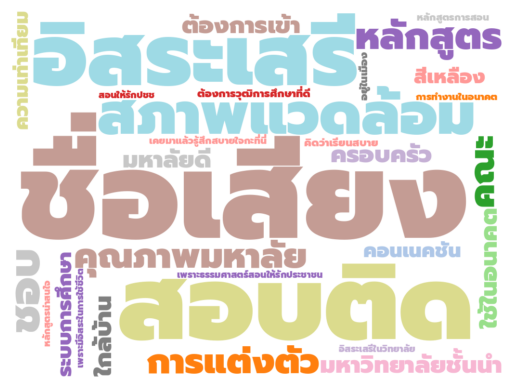

In [ ]:
wordcloud = WordCloud(font_path=path, #กำหนดfontที่ใช้แสดงผล
                      stopwords = {'มธ','มธ.','รู้สึกว่า'} ,#คำที่ไม่ให้แสดงผล(ไม่ได้ใช้)
                      background_color="white",
                      width=1024, # กว้าง
                      height=768, # ยาว
                      #colormap = 'turbo', #ธีมสีในคำ
                      #colormap = 'nipy_spectral',
                      colormap = 'tab20',
                      collocations=False,
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
                      prefer_horizontal = 0.7, #แสดงผลแนวนอน 0.7
                      max_words = 30
                      ).generate(all_word)
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

**ความพึงพอใจของการเรียนการสอนในด้านต่างๆ**

In [ ]:
scale = { '(มากที่สด)': 5, '(มาก)': 4, '(ปานกลาง)': 3, '(น้อย)': 2, '(น้อยทสด)': 1 }
satisfication = data.loc[: , ['ท่านพึงพอใจกับสภาพแวดล้อมการเรียนรู้',
                  'ท่านคิดว่าสภาพแวดล้อมการเรียนรู้มีผลต่อประสิทธิภาพในการเรียนการสอน',
                  'ท่านมีความพึงพอใจในวิธีการสอนของครูหรืออาจารย์',
                  'ท่านรู้สึกว่าครูหรืออาจารย์มีส่วนร่วมในการสร้างประสบการณ์การเรียนที่ดี',
                  'ท่านรู้สึกพึงพอใจกับการเรียนรู้ในระหว่างการเรียน',
                  'ท่านรู้สึกว่าความตั้งใจในการเรียนรู้มีผลต่อการประสบความสำเร็จในการเรียน',
                  'ท่านพึงพอใจกับสื่อการสอนที่ใช้ในชั้นเรียน (เช่น หนังสือเรียน, วิดีโอการสอน, หรือโปรแกรมคอมพิวเตอร์)',
                  'ท่านคิดว่าการใช้เทคโนโลยีสารสนเทศและการสื่อสารมีผลต่อการเรียนการสอน',
                  'ท่านคิดว่าสภาพแวดล้อมสังคมและวัฒนธรรมมีผลต่อการเรียนการสอน',
                  'ท่านพึงพอใจกับโครงสร้างและการจัดการของระบบการศึกษาที่คุณกำลังศึกษา']].replace(regex=scale)
labels = ['สภาพแวดล้อมการเรียนรู้',
          'สภาพแวดล้อมการเรียนรู้ต่อประสิทธิภาพในการเรียน',
          'วิธีการสอน',
          'อาจารย์มีส่วนร่วมในการสร้างประสบการณ์การเรียนที่ดี'
          'การเรียนรู้ในระหว่างการเรียน',
          'ความตั้งใจในต่อการประสบความสำเร็จ',
          'สื่อการสอน',
          'เทคโนโลยีสารสนเทศและการสื่อสารต่อการเรียน',
          'สภาพแวดล้อมสังคมและวัฒนธรรมต่อการเรียน',
          'โครงสร้างและการจัดการของระบบการศึกษา']
vals = satisfication.mean()
fig = go.Figure(go.Bar(
        y=labels,
        x=vals,
        text=vals,
        texttemplate="%{value}",
        orientation='h',
        marker=dict(color=px.colors.qualitative.Set3),
    ))
fig.update_layout(
    font_family="TH Sarabun New",
    height=1000, width=1000
 )
fig.update_layout(title={
        'text': "ความพึงพอใจของการเรียนการสอนในด้านต่างๆ",
        'x': 0.5},
                  xaxis_title="จำนวนนักศึกษา(คน)",
                  yaxis_title="หัวข้อความพึงพอใจ",
                  yaxis={'categoryorder':'total ascending'},
                  xaxis_range=[1,5],
                  xaxis = dict(
                      tickmode = "array",
                      tickvals = np.arange(len(vals))+1,
                      ticktext = ["1 (น้อยที่สุด)", '2', '3', '4', "5 (มากที่สุด)"]
                  ))
fig.show()

**ท่านพึงพอใจกับสภาพแวดล้อมการเรียนรู้**

In [ ]:
column_position = 6

data_exam = data.iloc[:, column_position].value_counts()

data_exam_dict = data_exam.to_dict()

print(data_exam_dict)

{4: 55, 5: 31, 3: 20, 1: 2, 2: 1}


In [ ]:
A='เห็นด้วยมากที่สุด'
B='เห็นด้วยมาก'
C='เห็นด้วยปานกลาง'
D='ไม่เห็นด้วย '
E='ไม่เห็นด้วยอย่างยิ่ง'
x_values = [E, D, C, B, A]
y_values = [2, 1, 20, 55, 31]
hover_text = ["คะแนน: " + str(val) for val in y_values]
point_positions = [2, 1, 20, 55, 31]
colors = ['#A96E7F', '#D69593', '#794B69','#492D53','#5B5581']
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x_values,
    y=y_values,
    mode='markers+text',
    name='Scatter Plot',
    marker=dict(
        size=25,
        symbol='circle',
        color=colors
    ),
    text=point_positions,
    textposition='top center',
    hovertext=hover_text
))
fig.update_layout(title='ความพึงพอใจกับสภาพแวดล้อมการเรียนรู้')

fig.update_layout(
    font_family="TH Sarabun New",
    height=700, width=800,
    title={
        'text': "ความพึงพอใจกับสภาพแวดล้อมการเรียนรู้",
        'x': 0.5}
 )

fig.show()

**ท่านคิดว่าสภาพแวดล้อมการเรียนรู้มีผลต่อประสิทธิภาพในการเรียนการสอน**

In [ ]:
column_position = 7

data_exam = data.iloc[:, column_position].value_counts()

data_exam_dict = data_exam.to_dict()

print(data_exam_dict)

{5: 82, 4: 24, 3: 3}


In [ ]:
A='เห็นด้วยมากที่สุด'
B='เห็นด้วยมาก'
C='เห็นด้วยปานกลาง'
D='ไม่เห็นด้วย '
E='ไม่เห็นด้วยอย่างยิ่ง'
x_values = [E,D, C, B, A]
y_values = [0, 0, 3, 24, 82]
bubble_sizes = [0, 0, 3, 24, 82]
bubble_labels = [str(size) for size in bubble_sizes]
colors = ['#A96E7F', '#D69593', '#794B69','#5B5581','#492D53']
fig = go.Figure(go.Scatter(
    x=x_values,
    y=y_values,
    mode='markers+text',
    text=bubble_labels,
    textposition='bottom center',
    marker=dict(
        size=bubble_sizes,
        sizemode='diameter',
        sizeref=2.*max(bubble_sizes)/(20.**2),
        sizemin=4,
        color=colors
    )
))
fig.update_layout(
    xaxis=dict(title='ความเห็น'),
    yaxis=dict(title='จำนวน'),
    font_family="TH Sarabun New",
    height=700, width=800,
    title={
        'text': "ท่านรู้สึกว่าสภาพแวดล้อมการเรียนรู้มีผลต่อประสิทธิภาพในการเรียนการสอน",
        'x': 0.5}
)
fig.show()


**ท่านมีความพึงพอใจในวิธีการสอนของครูหรืออาจารย์**

In [ ]:
column_position = 8

data_exam = data.iloc[:, column_position].value_counts()

data_exam_dict = data_exam.to_dict()

print(data_exam_dict)

{3: 49, 4: 40, 5: 13, 2: 7}


In [ ]:
A='เห็นด้วยมากที่สุด'
B='เห็นด้วยมาก'
C='เห็นด้วยปานกลาง'
D='ไม่เห็นด้วย '
E='ไม่เห็นด้วยอย่างยิ่ง'
labels = [A, B, C, D, E]
values = [13, 40, 49, 7, 0]
colors = ['#C6AC84', '#E2E5CC',	'#D9C2BD',	'#A2C4C6',	'#82B2B7']

fig = go.Figure(go.Funnel(
    y=labels,
    x=values,
    textinfo="value",
    #marker=dict(color=colors)
    marker=dict(color=px.colors.qualitative.Set3_r)
))

fig.update_layout(
    xaxis=dict(title='ความเห็น'),
    yaxis=dict(title='จำนวน'),
    font_family="TH Sarabun New",
    height=700, width=1000,
    title={
        'text': "ความพึงพอใจกับวิธีการสอนของครูหรืออาจารย์",
        'x': 0.5}
)

fig.show()

**ท่านรู้สึกว่าครูหรืออาจารย์มีส่วนร่วมในการสร้างประสบการณ์การเรียนที่ดี**

In [ ]:
column_position = 9

data_exam = data.iloc[:, column_position].value_counts()

data_exam_dict = data_exam.to_dict()

print(data_exam_dict)

{5: 53, 4: 39, 3: 14, 2: 2, 1: 1}


In [ ]:

A='เห็นด้วยมากที่สุด'
B='เห็นด้วยมาก'
C='เห็นด้วยปานกลาง'
D='ไม่เห็นด้วย '
E='ไม่เห็นด้วยอย่างยิ่ง'
labels = [f'{E}=1', f'{D}=2', f'{C}=14', f'{B}=39',f'{A}=53']
sizes = [1, 2, 14, 39, 53]

colors = ['#D69593','#A96E7F', '#794B69','#5B5581','#492D53']

fig = px.scatter(x=sizes, y=sizes, size=sizes, color=sizes, text=labels,
                 labels={'x': 'ขนาด', 'y': 'ขนาด'}, color_continuous_scale=colors)

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.update_layout(showlegend=False)

fig.update_layout(
    xaxis=dict(title='ความเห็น'),
    yaxis=dict(title='จำนวน'),
    font_family="TH Sarabun New",
    height=700, width=800,
    title={
        'text': "ท่านรู้สึกว่าครูหรืออาจารย์ที่มีส่วนร่วมในการสร้างประสบการณ์การเรียนที่ดี",
        'x': 0.5}
)

fig.show()

**ท่านรู้สึกพึงพอใจกับการเรียนรู้ในระหว่างการเรียน**

In [ ]:
column_position = 10

data_exam = data.iloc[:, column_position].value_counts()

data_exam_dict = data_exam.to_dict()

print(data_exam_dict)

{4: 42, 3: 39, 5: 22, 2: 5, 1: 1}


In [ ]:
pip install squarify

In [ ]:
import squarify
A='เห็นด้วยมากที่สุด'
B='เห็นด้วยมาก'
C='เห็นด้วยปานกลาง'
D='ไม่เห็นด้วย '
E='ไม่เห็นด้วยอย่างยิ่ง'
sizes = [1, 5, 39, 42, 22]
labels = [f'{E}=1', f'{D}=5', f'{C}=39', f'{B}=42',f'{A}=22']
data_feel = pd.DataFrame({'label': labels, 'size': sizes})

fig = px.treemap(data_feel, path=['label'], values='size')

colors = ['#C6AC84', '#E2E5CC',	'#D9C2BD',	'#A2C4C6',	'#82B2B7']

fig.update_traces(marker=dict(colors=colors))

fig.update_layout(
    xaxis=dict(title='ความเห็น'),
    yaxis=dict(title='จำนวน'),
    font_family="TH Sarabun New",
    height=700, width=1000,
    title={
        'text': "ความพึงพอใจกับการเรียนรู้ในระหว่างการเรียน",
        'x': 0.5}
)


fig.show()

**ท่านรู้สึกว่าความตั้งใจในการเรียนรู้มีผลต่อการประสบความสำเร็จในการเรียน**

In [ ]:
column_position = 11

data_exam = data.iloc[:, column_position].value_counts()

data_exam_dict = data_exam.to_dict()

print(data_exam_dict)

{5: 66, 4: 38, 3: 3, 2: 2}


In [ ]:
A='เห็นด้วยมากที่สุด'
B='เห็นด้วยมาก'
C='เห็นด้วยปานกลาง'
D='ไม่เห็นด้วย '
E='ไม่เห็นด้วยอย่างยิ่ง'
sizes = [66, 38, 3, 2, 0]
labels = [f'{A}=66', f'{B}=38', f'{C}=3', f'{D}=2',f'{E}=0']


# หาส่วนที่มีคนตอบเยอะสุด
max_index = sizes.index(max(sizes))
explode = [0] * len(labels)
explode[max_index] = 0.1  # highlight ส่วนที่มีคนตอบเยอะสุด

# สร้าง Pie Chart
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0']  # กำหนดสีให้แต่ละส่วน
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes,
                             hole=0.3,
                             marker=dict(colors=px.colors.qualitative.Set3_r),
                             pull=[0.1 if i == max_index else 0 for i in range(len(labels))],
                             textinfo='percent',
                             hoverinfo='label+percent'
                            )])

# กำหนดรายละเอียดเพิ่มเติม
fig.update_layout(
    xaxis=dict(title='ความเห็น'),
    yaxis=dict(title='จำนวน'),
    font_family="TH Sarabun New",
    height=700, width=1000,
    title={
        'text': "ท่านรู้สึกว่าความตั้งใจในการเรียนรู้มีผลต่อการประสบความสำเร็จในการเรียน",
        'x': 0.5}
)

# แสดงกราฟ
fig.show()

**ท่านพึงพอใจกับสื่อการสอนที่ใช้ในชั้นเรียน (เช่น หนังสือเรียน, วิดีโอการสอน, หรือโปรแกรมคอมพิวเตอร์)**

In [ ]:
column_position = 12

data_exam = data.iloc[:, column_position].value_counts()

data_exam_dict = data_exam.to_dict()

print(data_exam_dict)

{4: 50, 3: 29, 5: 21, 2: 8, 1: 1}


In [ ]:
# ข้อมูล
sizes = [21, 50, 29, 8, 1]
labels = [A,B,C,D,E]

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

fig = go.Figure(data=[go.Bar(y=labels, x=sizes, orientation='h',
                             text=sizes, textposition='inside',
                             marker=dict(color=px.colors.qualitative.Set3))])

fig.update_layout(
    xaxis=dict(title='ความเห็น'),
    yaxis=dict(title='จำนวน'),
    font_family="TH Sarabun New",
    height=700, width=1000,
    xaxis_title='Sizes',
    title={
        'text': "ความพึงพอใจกับสื่อการสอนที่ใช้ในชั้นเรียน (เช่น หนังสือเรียน, วิดีโอการสอน, หรือโปรแกรมคอมพิวเตอร์)",
        'x': 0.5}
)

fig.show()

**ท่านคิดว่าการใช้เทคโนโลยีสารสนเทศและการสื่อสารมีผลต่อการเรียนการสอน**

In [ ]:
column_position = 13

data_exam = data.iloc[:, column_position].value_counts()

data_exam_dict = data_exam.to_dict()

print(data_exam_dict)

{5: 65, 4: 34, 3: 8, 2: 2}


In [ ]:
sizes = [21, 50, 29, 8, 1]
labels = [f'{A}=21', f'{B}=50', f'{C}=29', f'{D}=8',f'{E}=1']
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=0.3, marker=dict(colors=px.colors.qualitative.Pastel1))])

fig.update_layout(title='ความคิดเห็นในเรื่องการใช้เทคโนโลยีสารสนเทศและการสื่อสารมีผลต่อการเรียนการสอน')

fig.update_layout(
    xaxis=dict(title='ความเห็น'),
    yaxis=dict(title='จำนวน'),
    font_family="TH Sarabun New",
    height=700, width=1000,
    xaxis_title='Sizes',
    title={
        'text': "ท่านรู้สึกว่าการใช้เทคโนโลยีสารสนเทศและการสื่อสารมีผลต่อการเรียนการสอน",
        'x': 0.5}
)
fig.show()

**ท่านคิดว่าสภาพแวดล้อมสังคมและวัฒนธรรมมีผลต่อการเรียนการสอน**

In [ ]:
column_position = 14

data_exam = data.iloc[:, column_position].value_counts()

data_exam_dict = data_exam.to_dict()

print(data_exam_dict)

{5: 73, 4: 26, 3: 7, 2: 3}


In [ ]:
labels = [A, B, C, D, E]
sizes = [73, 26, 7, 3,0]
colors = ['#C6AC84', '#E2E5CC',	'#D9C2BD',	'#A2C4C6',	'#82B2B7']

fig = go.Figure(data=[go.Bar(y=labels, x=sizes, orientation='h',
                             text=sizes, textposition='inside',
                             marker=dict(color=colors))])

fig.update_layout(
    xaxis=dict(title='ความเห็น'),
    yaxis=dict(title='จำนวน'),
    font_family="TH Sarabun New",
    height=700, width=1000,
    xaxis_title='Sizes',
    title={
        'text': "ท่านรู้สึกว่าสภาพแวดล้อมสังคมและวัฒนธรรมมีผลต่อการเรียนการสอน",
        'x': 0.5}
)
fig.show()

**ท่านพึงพอใจกับโครงสร้างและการจัดการของระบบการศึกษาที่คุณกำลังศึกษา**

In [ ]:
column_position = 15

data_exam = data.iloc[:, column_position].value_counts()

data_exam_dict = data_exam.to_dict()

print(data_exam_dict)

{3: 49, 4: 30, 5: 18, 2: 8, 1: 4}


In [ ]:
y_values = [4, 8, 49, 30, 18]
bubble_sizes = [4, 8, 49, 30, 18]
bubble_labels = [str(size) for size in bubble_sizes]

colors = ['#D69593','#A96E7F', '#492D53','#5B5581','#794B69']

fig = go.Figure(go.Scatter(
    x=x_values,
    y=y_values,
    mode='markers+text',
    text=bubble_labels,
    textposition='bottom center',
    marker=dict(
        size=bubble_sizes,
        sizemode='diameter',
        sizeref=2.*max(bubble_sizes)/(20.**2),
        sizemin=4,
        color=colors
    )
))
fig.update_layout(
    height=700, width=1000,
    xaxis=dict(title='ความเห็น'),
    yaxis=dict(title='จำนวน'),
    title={
        'text': "ความพึงพอใจกับโครงสร้างและการจัดการของระบบการศึกษาที่คุณกำลังศึกษา",
        'x': 0.5},
    font_family="TH Sarabun New"
)
fig.show()

**ท่านคิดว่าในอนาคต การศึกษาปริญญาตรีในยังมีบทบาทสำคัญอยู่หรือไม่**

In [ ]:
importan = data.groupby(data.iloc[:, 16])
importan = importan.size()
print(importan)

fig = px.pie(values=importan.values, names=importan.index,
             color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_traces(texttemplate = "%{value} <br>(%{percent})",
                 textposition = "outside")
fig.update_layout(
    title={
        'text': "การศึกษาปริญญาตรียังมีบทบาทสำคัญอยู่หรือไม่",
        'x': 0.5
    },
    font_family="TH Sarabun New",
    height=700, width=700,legend=dict(
        title="ความสำคัญ",
        orientation="h",
        yanchor="bottom",
        y=1,
        xanchor="center",
        x=0.5
    )
 )
fig.show()

ท่านคิดว่าในอนาคต การศึกษาปริญญาตรียังมีบทบาทสำคัญอยู่หรือไม่ 
มีบทบาทสำคัญ       95
ไม่มีบทบาทสำคัญ    14
dtype: int64


**จากข้อที่แล้ว ท่านคิดว่าเป็นเพราะเหตุ?**

In [ ]:
#นำแถวที่มี '-' ออก
reason2 = data.drop(data[data['จากข้อที่แล้ว ท่านคิดว่าเป็นเพราะเหตุ?'] == ('-')].index)

stop_words = {'ทุกคน','ต้อง','ใน','เพื่อ','นำ','ไป','เพราะ','มี','ทุก','ขึ้น','ไว้','ย่อม','การ','จาก','เป็น','สิ่ง','ที่','ใน','อาจ','ถูก','มองว่า','เป็น','สิ่ง','แต่',\
              'ถ้า','ทุกคน','มี','เหมือนกัน','จาก','จะ','กลาย','ใช้','หลาย','ได้','บาง','ยัง','เช่น','คิด','ว่า','ใน','ไทย','รับ','และ','นั้นๆ','ส่วนตัว','ยังคง','อยู่'\
              'ไม่','ของ','ก็','ทำให้','ต่างๆ','แล้ว','กว่า','อยู่','เรา','ไม่','ต่อ','ให้','ด้าน','ใบ','หรือ','ป','ๆ','มัน','สาย','จรืง','อะไร','เน้น','เกินไป','มากกว่า'\
              'น่าจะ','จริง','คน','แค่','ใช่','มากกว่า','ใครๆ','ที่จะ','มาก','ทำ','ผู้คน','สำคัญ'}
path = '/content/drive/MyDrive/CS246/Prompt-Black.ttf'

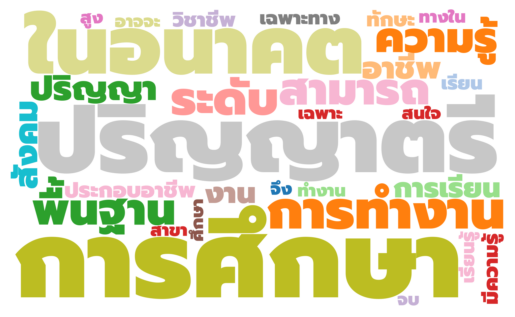

In [ ]:
#เลือกเฉพาะแถวที่ตอบ มีบทบาทสำคัญ
yes_data = reason2[reason2.iloc[:, 16] == 'มีบทบาทสำคัญ']
#เปลี่ยนคอลัมน์ 'จากข้อที่แล้ว ท่านคิดว่าเป็นเพราะเหตุ?' เป็นชนิด list
yes_word = yes_data['จากข้อที่แล้ว ท่านคิดว่าเป็นเพราะเหตุ?'].values.tolist()
#แบ่งคำ/ประโยคในแต่ละelement
wordLists = []
for w in yes_word:
  wordList = w.split(' ')
  wordLists.extend(wordList)
#ตัด element ที่เป็น ' ' ออก
for wo in wordLists:
  if wo == '':
    wordLists.remove(wo)
#นำทุก elements ใน list มารวมเป็นหนึ่ง str
word = ' '.join(wordLists).lower().strip('')
words = word_tokenize(word)
all_words = ' '.join(words).lower().strip('')


wordcloud = WordCloud(font_path=path,
                      stopwords = stop_words ,
                      background_color="white",
                      width=2000, # กว้าง
                      height=1200, # ยาว
                      #colormap = 'turbo', #ธีมสีในคำ
                      #colormap = 'nipy_spectral',
                      colormap = 'tab20',
                      collocations=False,
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
                      prefer_horizontal = 0.7, #แสดงผลแนวนอน 0.7
                      max_words = 30
                      ).generate(all_words)
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

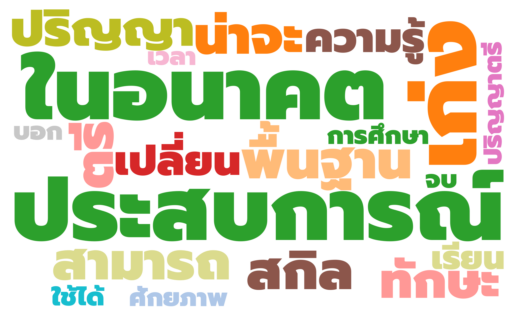

In [ ]:
#เลือกเฉพาะแถวที่ตอบ ไม่มีบทบาทสำคัญ
no_data = data[data.iloc[:, 16] == 'ไม่มีบทบาทสำคัญ']
#เปลี่ยนคอลัมน์ 'จากข้อที่แล้ว ท่านคิดว่าเป็นเพราะเหตุ?' เป็นชนิด list
no_word = no_data['จากข้อที่แล้ว ท่านคิดว่าเป็นเพราะเหตุ?'].values.tolist()
#แบ่งคำ/ประโยคในแต่ละelement
wordLists = []
for w in no_word:
  wordList = w.split(' ')
  wordLists.extend(wordList)
#ตัด element ที่เป็น ' ' ออก
for wo in wordLists:
  if wo == '':
    wordLists.remove(wo)
#นำทุก elements ใน list มารวมเป็นหนึ่ง str
word = ' '.join(wordLists).lower().strip('')
words = word_tokenize(word)
all_words = ' '.join(words).lower().strip('')


wordcloud = WordCloud(font_path=path,
                      stopwords = stop_words ,
                      background_color="white",
                      width=2000, # กว้าง
                      height=1200, # ยาว
                      #colormap = 'turbo', #ธีมสีในคำ
                      #colormap = 'nipy_spectral',
                      colormap = 'tab20',
                      collocations=False,
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
                      prefer_horizontal = 0.7, #แสดงผลแนวนอน 0.7
                      max_words = 20
                      ).generate(all_words)
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

# ส่วนที่ 3 : ความคาดหวังของการเรียนการสอนในอนาคต

**ทักษะอะไรที่นักศึกษาจำเป็นต้องมีสำหรับการเรียนการสอนในอนาคต?**

In [ ]:
#เปลี่ยนคอลัมน์ จาก dataframe เป็นชนิด list
x_word = data.iloc[:, 18].values.tolist()
#นำทุก elements ใน list มารวมเป็นหนึ่ง str
word = ' '.join(x_word).lower().strip('')
# ตัดคำด้วยเครื่องหมาย ","
words = word.split(', ')
#แบ่งคำ/ประโยคในแต่ละelement
wordLists = []
for w in words:
  wordList = w.split(' ')
  wordLists.extend(wordList)

#นับความถี่ของแต่ละข้อ
frequencies = {}
for wo in wordLists:
    if wo in frequencies:
        frequencies[wo] += 1
    else:
        frequencies[wo] = 1
print("ความถี่ของแต่ละคำ:")
for word, freq in frequencies.items():
    print(f"{word}: {freq}")

ความถี่ของแต่ละคำ:
ทักษะการคิดวิเคราะห์และแก้ปัญหา: 98
ทักษะการเรียนรู้และปรับตัว: 96
ทักษะการสื่อสารและการทำงานเป็นทีม:: 67
ทักษะด้านเทคโนโลยี: 87
ทักษะด้านภาษา: 83
ทักษะด้านความคิดสร้างสรรค์: 77
ทักษะด้านความฉลาดทางอารมณ์: 85
ทักษะด้านความเป็นผู้นำ: 61
ทักษะการสื่อสารและการทำงานเป็นทีม: 26


In [ ]:
a='ทักษะการคิดวิเคราะห์และแก้ปัญหา'
a_d=95
b='ทักษะการเรียนรู้และปรับตัว'
b_d=94
c='ทักษะการสื่อสารและการทำงานเป็นทีม:'
c_d=90
d='ทักษะด้านเทคโนโลยี'
d_d=84
e='ทักษะด้านภาษา'
e_d=81
f='ทักษะด้านความคิดสร้างสรรค์'
f_d=73
g='ทักษะด้านความฉลาดทางอารมณ์'
g_d=83
h='ทักษะด้านความเป็นผู้นำ'
h_d=58

x_values = [a, b, c, d, e, f, g, h]
y_values = [95, 94, 90, 84, 81, 73, 83, 58]

colors = ['#03045e', '#023e8a', '#0077b6', '#0096c7', '#48cae4', '#90e0ef', '#00b4d8', '#ade8f4']

fig = go.Figure(data=[go.Bar(y=x_values, x=y_values, orientation='h',
                             text=y_values, textposition='inside',
                             marker=dict(color=colors
                                         ))])
fig.update_layout(title={
        'text': "ทักษะที่นักศึกษาจำเป็นต้องมีสำหรับการเรียนการสอนในอนาคต",
        'x': 0.5},
                  height=700, width=1000,
                  font_family="TH Sarabun New",
                  xaxis_title='จำนวนคน',
                  yaxis={'categoryorder':'total ascending'},
                  yaxis_title='คำตอบ')
fig.show()

**ท่านคิดว่าอะไรคือสิ่งที่สำคัญที่สุดที่เราควรทำเพื่อเตรียมพร้อมสำหรับการศึกษาในอนาคต?**

In [ ]:
column_position = 19

data_exam = data.iloc[:, column_position].value_counts()

data_exam_dict = data_exam.to_dict()

print(data_exam_dict)

{'ยืดหยุ่น ปรับตัว': 48, 'คิดวิเคราะห์ แก้ปัญหา': 26, 'เรียนรู้ด้วยตนเอง': 26, 'สื่อสาร ทำงานเป็นทีม': 9}


In [ ]:
A='เรียนรู้ด้วยตนเอง'
B='คิดวิเคราะห์ แก้ปัญหา'
C='สื่อสาร ทำงานเป็นทีม'
D='ยืดหยุ่น ปรับตัว'
E='อื่นๆ'

x_values = [E, D, C, B, A]
y_values = [0, 48, 9, 26, 26]
bubble_sizes = [0, 48, 9, 26, 26]
bubble_labels = [str(size) for size in bubble_sizes]
#hover_text = ["คะแนน: " + str(val) for val in y_values]
#point_positions = [0, 48, 9, 26, 26]
colors = ['#D69593', '#492D53','#A96E7F','#794B69','#794B69']

fig = go.Figure(go.Scatter(
    x=x_values,
    y=y_values,
    mode='markers+text',
    text=bubble_labels,
    textposition='bottom center',
    marker=dict(
        size=bubble_sizes,
        sizemode='diameter',
        sizeref=2.*max(bubble_sizes)/(20.**2),
        sizemin=4,
        color=colors
    )
))

fig.update_layout(
    xaxis=dict(title='ความเห็น'),
    yaxis=dict(title='จำนวน'),
    title={
        'text': "สิ่งที่สำคัญที่สุดที่เราควรทำเพื่อเตรียมพร้อมสำหรับการศึกษาในอนาคต",
        'x': 0.5},
    height=700, width=1000,
    font_family="TH Sarabun New"
)
fig.show()

**ท่านคิดว่ารูปแบบการเรียนการสอนในอนาคตจะเปลี่ยนไปอย่างไร?**

In [ ]:
column_position = 20

data_exam = data.iloc[:, column_position].value_counts()

data_exam_dict = data_exam.to_dict()

print(data_exam_dict)


{'เน้นการเรียนรู้แบบ Active Learning : คือ ผู้เรียนมีส่วนร่วมในการเรียนรู้ ลงมือทำ กิจกรรม': 48, 'เน้นการเรียนรู้แบบ Personalized : คือ ปรับเนื้อหา รูปแบบการเรียนรู้ ให้เหมาะกับผู้เรียนแต่ละคน': 33, 'น้นการเรียนรู้ด้วยตนเอง: คือ ผู้เรียนค้นหาข้อมูล เรียนรู้ด้วยตัวเอง': 16, 'เน้นการเรียนรู้แบบ Blended Learning : คือ ผสมผสานการเรียนรู้แบบออนไลน์ และ ออฟไลน์': 12}


In [ ]:
A='เน้นการเรียนรู้แบบ Personalized'
B='เน้นการเรียนรู้ด้วยตนเอง'
C='เน้นการเรียนรู้แบบ Active Learning'
D='เน้นการเรียนรู้แบบ Blended Learning'
E='อื่นๆ:'

In [ ]:
sizes = [33, 16, 48, 12, 0]
labels = [f'{A} = 33', f'{B} = 16', f'{C} = 48', f'{D} = 12', f'{E} = 0']
colors = px.colors.qualitative.Pastel1

fig = go.Figure(data=[go.Pie(labels=labels, values=sizes)])
fig.update_traces(textinfo='label+percent', textfont_size=15,textposition = "outside")
#fig.update_traces(texttemplate = "%{value} <br>(%{percent})")

# ปรับสีให้เป็นสีอ่อน
fig.update_traces(marker=dict(colors=colors))

fig.update_layout(
    xaxis=dict(title='ความเห็น'),
    yaxis=dict(title='จำนวน'),
    title={
        'text': "การเปลี่ยนแปลงของรูปแบบการเรียนการสอนในอนาคต",
        'x': 0.5},
    height=700, width=1000,
    font_family="TH Sarabun New"
)
fig.show()

**ท่านคิดว่าเทคโนโลยีอะไรบ้างจะส่งผลต่อการศึกษาอนาคต**

In [ ]:
column_position = 21

data_exam = data.iloc[:, column_position].value_counts()

data_exam_dict = data_exam.to_dict()

print(data_exam_dict)

{'ปัญญาประดิษฐ์ (AI) คือ วิเคราะห์ข้อมูล แนะนำแนวทางการเรียนรู้': 67, 'เทคโนโลยีเสมือนจริง (VR) คือ จำลองสถานการณ์เสมือนจริง': 16, 'เทคโนโลยีการแปลภาษาแบบเรียลไทม์ : เข้าใจภาษาต่างประเทศ': 13, 'เกม (Gamification) คือ ฝึกทักษะการคิดวิเคราะห์ แก้ปัญหา': 12, 'ท้งหมด': 1}


In [ ]:
A='ปัญญาประดิษฐ์(AI)'
B='เทคโนโลยีเสมือนจริง(VR)'
C='เกม(Gamification)'
D='เทคโนโลยีการแปลภาษาแบบเรียลไทม์'
E='ทั้งหมด'

In [ ]:
sizes = [67, 16, 13, 12, 1]
labels = [A, B, C, D, E]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

fig = go.Figure(data=[go.Bar(y=labels, x=sizes, orientation='h',
                             text=sizes, textposition='inside',
                             marker=dict(color=px.colors.qualitative.Pastel))])
fig.update_layout(title={
        'text': "เทคโนโลยีที่จะส่งผลต่อการศึกษาอนาคต",
        'x': 0.5},
                  height=700, width=1000,
                  font_family="TH Sarabun New",
                  xaxis_title='Sizes')
fig.show()

**ท่านคิดว่าระบบการประเมินผลในอนาคตควรเป็นอย่างไร**

In [ ]:
column_position = 23

data_exam = data.iloc[:, column_position].value_counts()

data_exam_dict = data_exam.to_dict()

print(data_exam_dict)

{'ประเมินผลแบบองค์รวม คือ ประเมินผลมากกว่าความรู้ เน้นทักษะ ความสามารถ พฤติกรรม': 45, 'ประเมินผลแบบ Personalized คือ ออกแบบการประเมินผล เหมาะกับผู้เรียนแต่ละคน': 35, 'ประเมินผลแบบ Real-time คือ ประเมินผลตลอดการเรียนรู้ ไม่รอสอบปลายภาค': 25, 'ประเมินผลแบบ Peer-assessment คือ ผู้เรียนประเมินผลกันเอง เรียนรู้จากเพื่อน': 2, 'ใช้เกณฑ์ต่างๆแบบปัจจุบัน ดีอยู่แล้ว': 1, 'ประเมินด้วยการสอบ แต่เป็นการสอบที่สามารถใช้เครื่องมือได้ สามารถเข้าถึงแหล่งข้อมูลได้อิสระ ทั้งแบบเดี่ยวและการทำงานเป็นทีม ซึ่งสอดคล้องกับชีวิตการทำงานจริงมากกว่าการสอบที่ใช้ความจำเขียนใส่กระดาษเพียงอย่างเดียว': 1}


In [ ]:
A='ประเมินผลแบบองค์รวม'
B='ประเมินผลแบบ Real-time'
C='ประเมินผลแบบ Personalized'
D='ประเมินผลแบบ Peer-assessment'
E='อื่นๆ'

In [ ]:
sizes = [45, 35, 25, 2, 2]
labels = [f'{A}=45', f'{B}=35', f'{C}=25', f'{D}=2',f'{E}=2']

import pandas as pd
data_system = pd.DataFrame({'label': labels, 'size': sizes})

fig = px.treemap(data_system, path=['label'], values='size')

fig.update_layout(title={
        'text': "ระบบการประเมินผลในอนาคต",
        'x': 0.5},
                  height=500, width=1000,
                  font_family="TH Sarabun New",
                  xaxis_title='Sizes')

colors = ['#A2C4C6','#82B2B7','#D9C2BD', '#E2E5CC',	'#C6AC84'	]
fig.update_traces(marker=dict(colors=colors))

fig.show()

**ท่านคิดว่าอะไรคืออุปสรรคที่สำคัญที่สุดต่อการศึกษาที่มีคุณภาพในอนาคต?**

In [ ]:
column_position = 24

data_exam = data.iloc[:, column_position].value_counts()

data_exam_dict = data_exam.to_dict()

print(data_exam_dict)

{'ความเหลื่อมล้ำ': 72, 'แรงจูงใจ': 15, 'การจัดการเวลา': 12, 'เทคโนโลยี': 7, 'สภาพแวดล้อม': 1, 'คุณภาพของศาสตร์ที่จะเรียน': 1, 'ทุกอย่าง': 1}


In [ ]:
A='ความเหลื่อมล้ำ'
B='เทคโนโลยี'
C='การจัดการเวลา'
D='แรงจูงใจ'
E='อื่นๆ:'

In [ ]:
#fig, ax = plt.subplots(figsize=(8, 10))

sizes = [72, 7, 12, 15, 3]
labels = [f'{A}=72', f'{B}=7', f'{C}=12', f'{D}=15',f'{E}=3']
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

max_index = sizes.index(max(sizes))
explode = [0] * len(labels)
explode[max_index] = 0.1

fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=.3,
                             marker=dict(colors=px.colors.qualitative.Set3))])

fig.update_traces(textinfo='label+percent', textfont_size=15,textposition = "outside")

fig.update_layout(title={
        'text': "อุปสรรคที่สำคัญที่สุดต่อการศึกษาที่มีคุณภาพในอนาคต",
        'x': 0.5},
                  height=1000, width=1000,
                  font_family="TH Sarabun New",
                  xaxis_title='Sizes')

fig.show()